 Question 1: Implementing Rosenblatt’s Perceptron from Scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

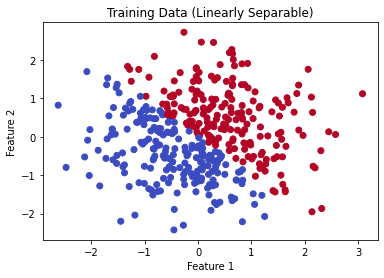

In [12]:
# Generate Linearly Separable Data
def generate_data(n_samples=500):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)  # Two features
    y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Linearly separable decision boundary
    return X, y

# Generate and visualize data
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.tolist(), cmap='coolwarm')
plt.title("Training Data (Linearly Separable)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Epoch 1/20, Total Error: [22]
Epoch 2/20, Total Error: [20]
Epoch 3/20, Total Error: [32]
Epoch 4/20, Total Error: [24]
Epoch 5/20, Total Error: [18]
Epoch 6/20, Total Error: [14]
Epoch 7/20, Total Error: [14]
Epoch 8/20, Total Error: [14]
Epoch 9/20, Total Error: [10]
Epoch 10/20, Total Error: [14]
Epoch 11/20, Total Error: [12]
Epoch 12/20, Total Error: [14]
Epoch 13/20, Total Error: [8]
Epoch 14/20, Total Error: [16]
Epoch 15/20, Total Error: [16]
Epoch 16/20, Total Error: [16]
Epoch 17/20, Total Error: [16]
Epoch 18/20, Total Error: [16]
Epoch 19/20, Total Error: [8]
Epoch 20/20, Total Error: [18]


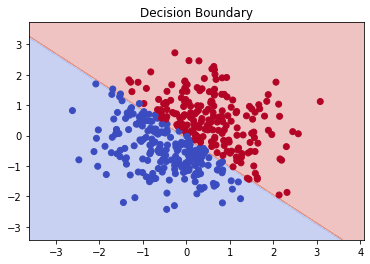

Perceptron classification accuracy: 0.96


In [14]:
def step_function(x):
    return np.where(x >= 0, 1, -1)

# Perceptron Class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))  # Store as matrix
        self.bias = 0
        
        errors = []  # Track errors per iteration
        
        for epoch in range(self.n_iters):
            total_error = 0
            for i in range(n_samples):
                # Forward Pass: Compute weighted sum + bias
                weighted_sum = np.dot(X[i], self.weights) + self.bias
                y_predicted = step_function(weighted_sum)

                # Compute error
                error = y[i] - y_predicted
                total_error += abs(error)

                # Backward Pass: Update weights using Perceptron Rule
                self.weights += self.lr * error * X[i].reshape(-1, 1)
                self.bias += self.lr * error

            errors.append(total_error)
            print(f"Epoch {epoch+1}/{self.n_iters}, Total Error: {total_error}")
    
    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return step_function(weighted_sum)

# Generate and split data
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=20)
perceptron.fit(X_train, y_train)

# Plot Decision Boundary
def plot_decision_boundary(X, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y_train.tolist(), cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, perceptron)

# Test Accuracy
y_pred = perceptron.predict(X_test).flatten()
accuracy = np.mean(y_pred == y_test)
print(f"Perceptron classification accuracy: {accuracy:.2f}")